In [2]:
import string
import os

docs = []
dirpath = "C:\\Users\\fratt\\OneDrive\\Desktop\\LM_1anno_1semestre\\Data_Science_Lab\\Labs\\Lab_5\\T-newsgroups\\T-newsgroups"
files = os.listdir(dirpath)
files.sort(key = lambda x: int(x))
for filename in files:
    with open(dirpath + "\\" + filename) as f:
        doc = f.read()
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")    
        docs.append(doc) 

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw


class LemmaTokenizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        
    def __call__(self, document):
        lemmas = [] 
        for t in word_tokenize(document):
            t = t.strip()
            lemma = self.lemmatizer.lemmatize(t)
            if(len(lemma)>1):
                lemmas.append(lemma)
        return lemmas   

In [4]:
other_sws = ['one','least','around','thing','either','even','almost','certainly','however','pretty',"still","need","will","much","well","maybe","perhaps","every","others","kind","'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would']
my_stop_words = sw.words('english') + other_sws
lemmaTokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer = lemmaTokenizer, stop_words=my_stop_words, min_df = 2, max_df=0.5)

In [5]:
x = vectorizer.fit_transform(docs)

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3, random_state=12)
red_x = svd.fit_transform(x)
red_norm_x = red_x

In [7]:
from sklearn import preprocessing
red_norm_x = preprocessing.normalize(red_x, norm='l2')

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
k = 4

# clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage='ward').fit_predict(red_norm_x)
clustering = KMeans(n_clusters = k).fit_predict(red_norm_x)
s = silhouette_score(red_norm_x, clustering, metric = 'euclidean')
print(f"{k} clusters --> silhouette = {s}")
label_counter = np.full(k,0)
for i,label in enumerate(clustering):
    label_counter[label] += 1
print(label_counter)

4 clusters --> silhouette = 0.5430360460692623
[ 833  922  897 1348]


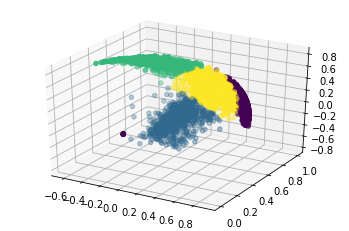

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xd = list(red_norm_x[:,0])
yd = list(red_norm_x[:,1])
zd = list(red_norm_x[:,2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(zd,xd,yd, c=clustering)
plt.show()

In [20]:
import csv

with open("results.csv", mode='w', encoding='utf-8', newline='') as f:
    f_writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    f_writer.writerow(["Id", "Predicted"])
    for i in range(len(clustering)):
        f_writer.writerow([i, clustering[i]])

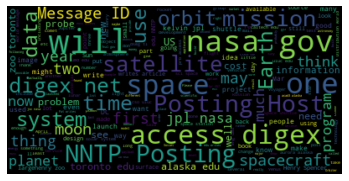

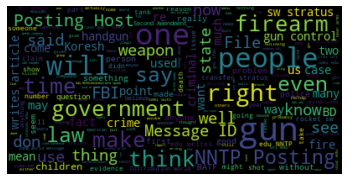

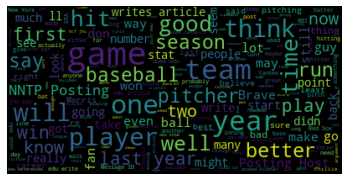

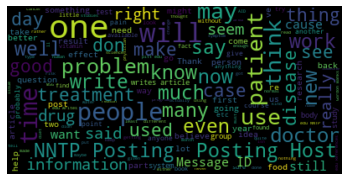

In [22]:
from wordcloud import WordCloud
import string

docs_per_cluster = [[] for k in range(k)]
for i in range(len(clustering)):
    docs_per_cluster[clustering[i]].append(docs[i])
for cluster in docs_per_cluster:
    separator = ' '
    full_document = separator.join(cluster)
    wordcloud = WordCloud(max_font_size=40).generate(full_document) 
    fig = plt.subplots()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")